In [3]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Get data 


In [4]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [5]:
import os 
import tarfile
import urllib 



In [6]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    # make the housing housing path 
    os.makedirs(housing_path, exist_ok=True)
    
    # fetch the data set 
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    # unzip 
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [7]:
fetch_housing_data()

In [8]:
import pandas as pd 

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [9]:
housing  = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [11]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [12]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [13]:
%matplotlib inline 
import matplotlib.pyplot as plt


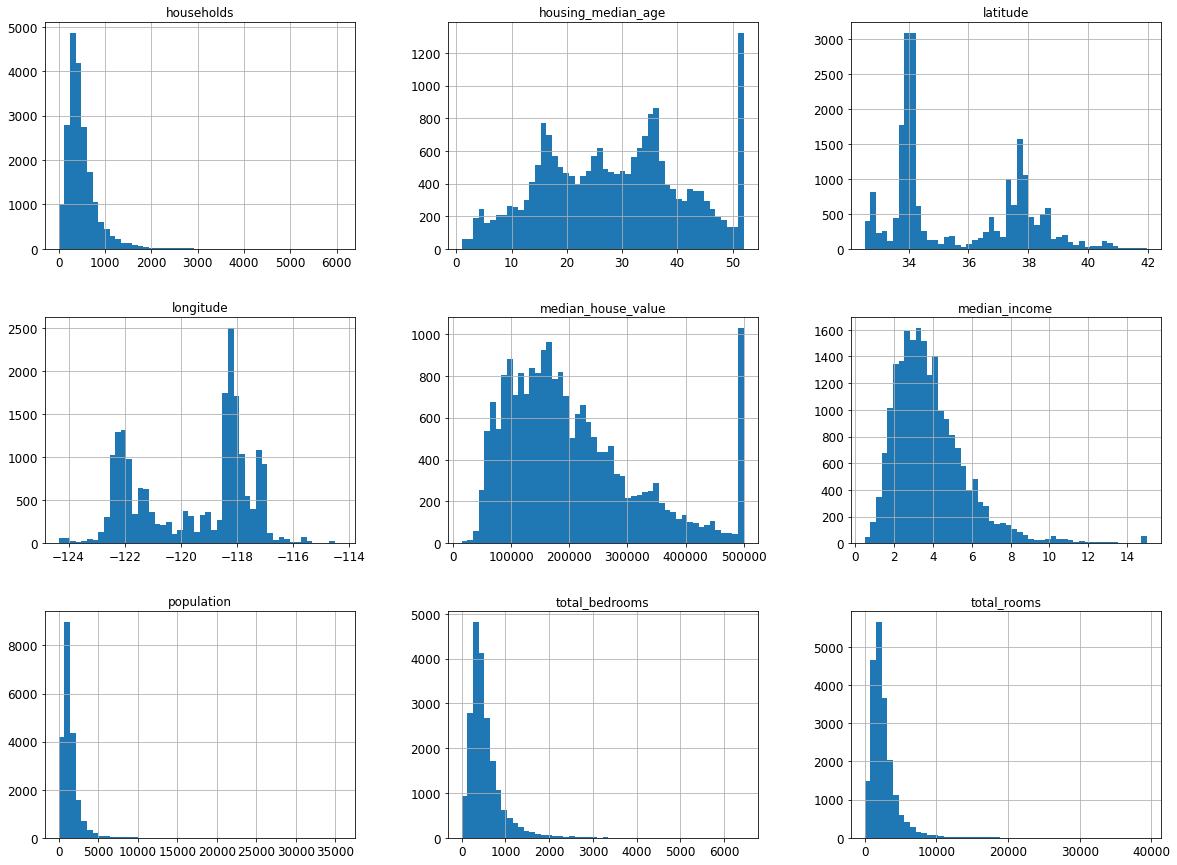

In [14]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
np.random.seed(42)

In [16]:
def shuffle_and_split(data, test_ratio):
    num_perm = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = num_perm[:test_set_size]
    train_indices = num_perm[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [17]:
train_set, test_set = shuffle_and_split(housing, 0.2)
len(train_set)


16512

In [18]:
len(test_set)

4128

In [19]:
from sklearn.model_selection import train_test_split


In [20]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

test_set.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


## Discover and visualize the data

## Exploratory data analysis

In [79]:
housing = train_set.copy()

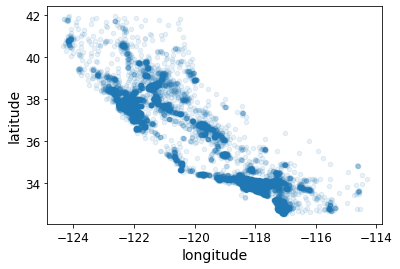

In [80]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

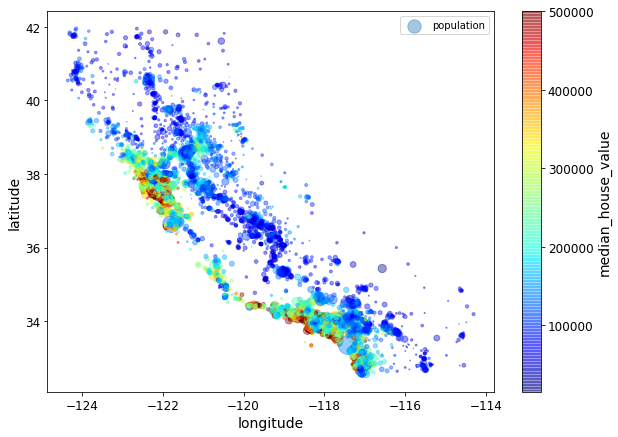

In [81]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

In [82]:
# Download the California image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "california.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/end_to_end_project/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('./images/end_to_end_project/california.png',
 <http.client.HTTPMessage at 0x7faf81e21b00>)

Saving figure california_housing_prices_plot


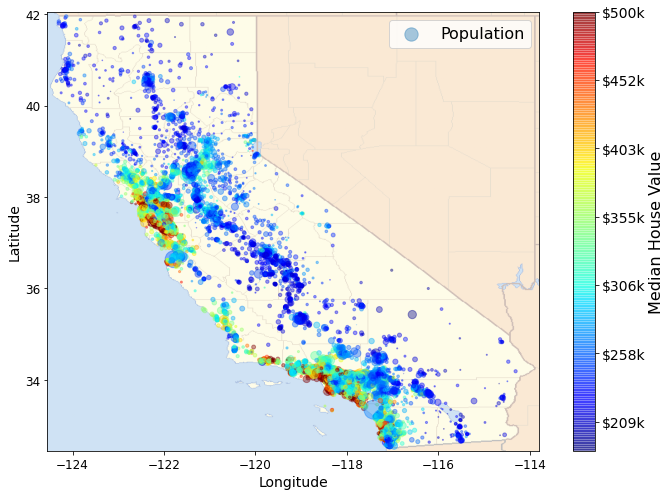

In [83]:
import matplotlib.image as mpimg


california_img=mpimg.imread(os.path.join(images_path, filename))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
save_fig("california_housing_prices_plot")
plt.show()

## Correlation among the attributes


In [84]:
corr_matrix = housing.corr()

In [85]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647
median_house_value,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000


In [86]:
corr_matrix["median_house_value"].sort_values(ascending=True)

latitude             -0.142983
longitude            -0.046349
population           -0.026032
total_bedrooms        0.047980
households            0.063714
housing_median_age    0.103706
total_rooms           0.133989
median_income         0.690647
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [87]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf81e35400>,
      dtype=object)

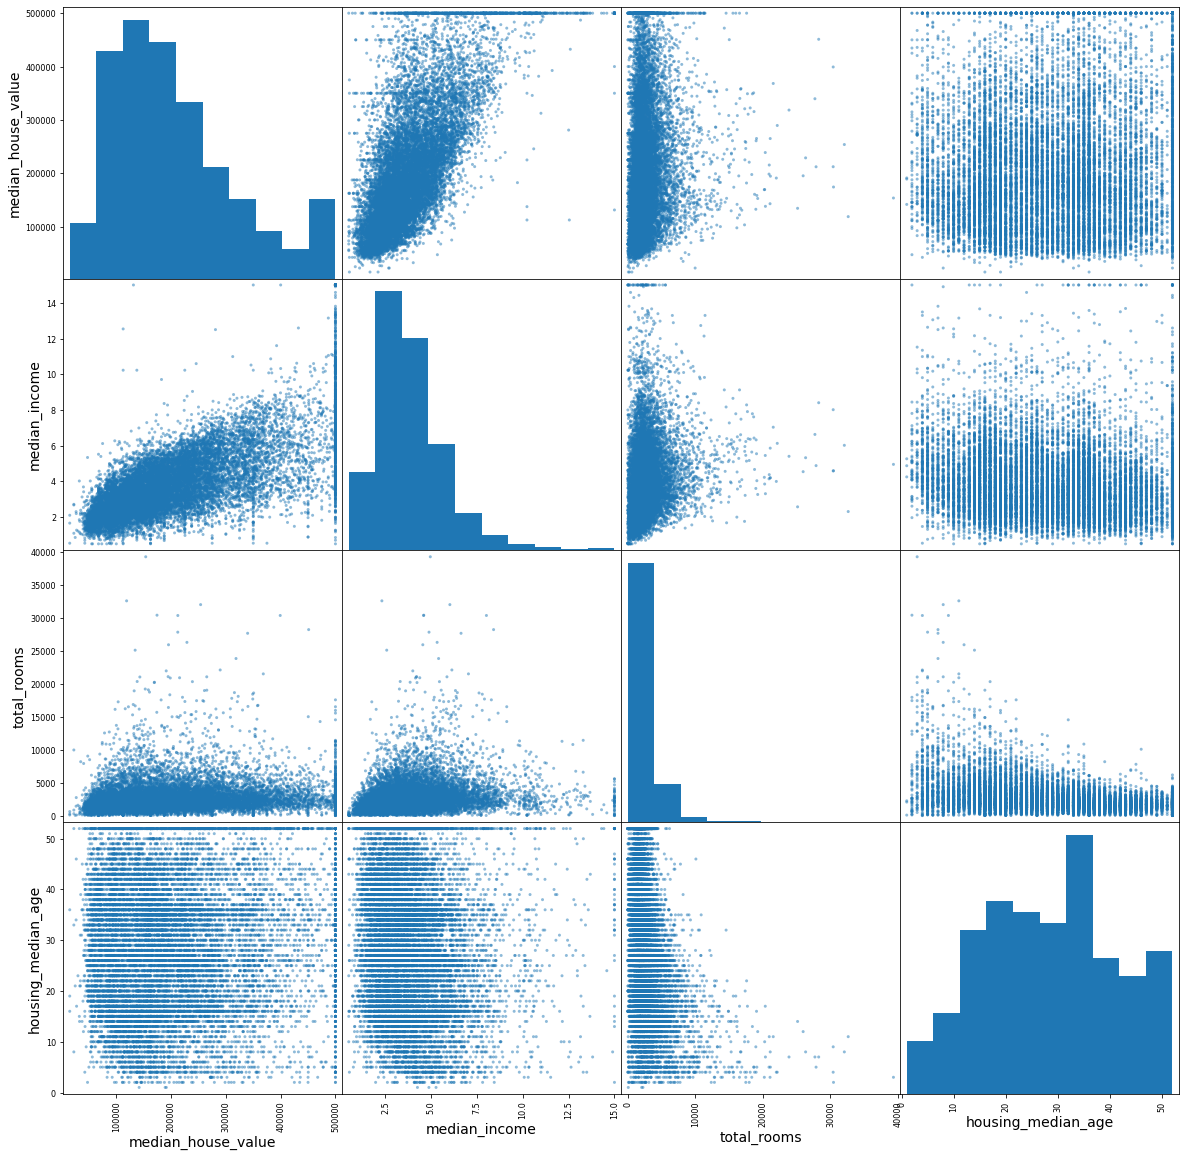

In [88]:
attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(20,20))

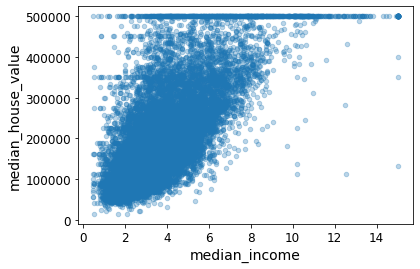

In [89]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.3)

## Combining the attributes 


In [90]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [91]:
housing["rooms_per_household"] = housing["total_bedrooms"]/housing["households"]

In [92]:
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [93]:

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.690647
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
rooms_per_household        -0.051351
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

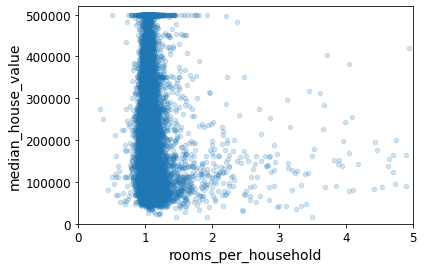

In [94]:
housing.plot(kind="scatter", x="rooms_per_household", y="median_house_value",
             alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()


In [95]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 16512 non-null  float64
 1   latitude                  16512 non-null  float64
 2   housing_median_age        16512 non-null  float64
 3   total_rooms               16512 non-null  float64
 4   total_bedrooms            16512 non-null  float64
 5   population                16512 non-null  float64
 6   households                16512 non-null  float64
 7   median_income             16512 non-null  float64
 8   median_house_value        16512 non-null  float64
 9   ocean_proximity           16512 non-null  object 
 10  rooms_per_household       16512 non-null  float64
 11  bedrooms_per_room         16512 non-null  float64
 12  population_per_household  16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


In [96]:
housing = train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = train_set["median_house_value"].copy()


In [97]:
from sklearn.impute import SimpleImputer

In [98]:
imputer = SimpleImputer(strategy="median")


In [99]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [100]:
housing_num.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542


In [101]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [102]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [103]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2129.    ,  437.    , 1167.    ,
        410.    ,    3.5458])

In [104]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [105]:
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542


In [106]:

housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
14196,NEAR OCEAN
8267,NEAR OCEAN
17445,NEAR OCEAN
14265,NEAR OCEAN
2271,INLAND
17848,<1H OCEAN
6252,<1H OCEAN
9389,NEAR BAY
6113,<1H OCEAN
6061,<1H OCEAN


In [107]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[4.],
       [4.],
       [4.],
       [4.],
       [1.],
       [0.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [108]:
encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [109]:
print(type(housing_cat_encoded))


<class 'numpy.ndarray'>


In [110]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()
housing_one_hot_encoded = onehot_encoder.fit_transform(housing_cat)
housing_one_hot_encoded.toarray()

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

## Lets build sklearn pipeline 


In [111]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),  
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)


In [113]:
from sklearn.compose import ColumnTransformer

num_attributes = list(housing_num)

full_pipeline = ColumnTransformer([
    ("num_pipeline", num_pipeline, num_attributes),
    ("cat_pipeline", OneHotEncoder(), ["ocean_proximity"])
])

housing_transformed = full_pipeline.fit_transform(housing)

In [114]:
housing_transformed.shape


(16512, 16)

## Prepare the model 


In [115]:
from sklearn.linear_model import LinearRegression

linear_regression_model = LinearRegression()
linear_regression_model.fit(housing_transformed, housing_labels)


LinearRegression()

In [116]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [147]:
some_sample_data = housing.iloc[:5]
some_sample_labels = housing_labels.iloc[:5]
some_sample_data_prepared = full_pipeline.transform(some_sample_data)
lin_reg_predictions = linear_regression_model.predict(some_sample_data_prepared)

In [148]:
lin_reg_predictions

array([181746.54359616, 290558.74973505, 244957.50017771, 146498.51061398,
       163230.42393939])

In [149]:
rmse  = [ (x[0]-x[1])**2 for x in zip(lin_reg_predictions,some_sample_labels)]

In [150]:
rmse_mean = np.mean(rmse)
np.sqrt(rmse_mean)


73605.47230869911

In [151]:
some_sample_data.shape

(5, 9)

In [152]:
lin_reg_predictions.shape

(5,)

In [153]:
from sklearn.metrics import mean_squared_error

rmse2 = mean_squared_error(lin_reg_predictions, some_sample_labels)
np.sqrt(rmse2)

73605.47230869911

In [155]:
housing_predictions = linear_regression_model.predict(housing_transformed)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

67593.20745775253

In [161]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(linear_regression_model, housing_transformed, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [162]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [65000.67382615 70960.56056304 67122.63935124 66089.63153865
 68402.54686442 65266.34735288 65218.78174481 68525.46981754
 72739.87555996 68957.34111906]
Mean: 67828.38677377408
Standard deviation: 2468.0913950652284


In [163]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(housing_transformed, housing_labels)

svm_scores = cross_val_score(svm_reg, housing_transformed, housing_labels, scoring="neg_mean_squared_error", cv=10)
svm_rmse_scores = np.sqrt(-svm_scores)

display_scores(svm_rmse_scores)

Scores: [112050.87849982 114536.24081197 112299.03602669 107688.98760902
 111449.22200782 112488.86999845 108893.88001456 109990.93115428
 112234.84475753 113190.29994194]
Mean: 111482.31908220919
Standard deviation: 1952.641196092734


In [168]:
from sklearn.model_selection import GridSearchCV

svm_reg2 = SVR()
param_grid = [
        {'kernel': ['linear'], 'C': [10., 30.]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0],
         'gamma': [0.01]},
    ]

gridsearchmodel = GridSearchCV(svm_reg2, param_grid)
gridsearchmodel.fit(housing_transformed, housing_labels)

GridSearchCV(estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0], 'kernel': ['linear']},
                         {'C': [1.0, 3.0], 'gamma': [0.01], 'kernel': ['rbf']}])

In [170]:
gridsearchmodel.best_estimator_

SVR(C=30.0, kernel='linear')

In [175]:
gridsearchmodel.get_params

<bound method BaseEstimator.get_params of GridSearchCV(estimator=SVR(),
             param_grid=[{'C': [10.0, 30.0], 'kernel': ['linear']},
                         {'C': [1.0, 3.0], 'gamma': [0.01], 'kernel': ['rbf']}])>

In [176]:

cvres = gridsearchmodel.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

nan {'C': 10.0, 'kernel': 'linear'}
nan {'C': 30.0, 'kernel': 'linear'}
0.2314960427039503 {'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}
0.2228363039096659 {'C': 3.0, 'gamma': 0.01, 'kernel': 'rbf'}


/Users/aman.jain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


In [189]:
feature_importances = gridsearchmodel.best_estimator_.coef_
feature_importances

array([[-19217.59566636, -16349.15350682,   8360.19494245,
          5418.67259703,   8128.89380719, -17239.06418476,
         10261.30436414,  67105.40308296,   4286.03486033,
         -1305.44960662,   8271.95260853,  13704.56317287,
        -33205.15331107,    120.        ,   7320.59013819,
         12060.        ]])

In [188]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
#cat_encoder = cat_pipeline.named_steps["cat_encoder"] # old solution
cat_encoder = full_pipeline.named_transformers_["cat_pipeline"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attributes + extra_attribs + cat_one_hot_attribs
attributes

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'rooms_per_hhold',
 'pop_per_hhold',
 'bedrooms_per_room',
 '<1H OCEAN',
 'INLAND',
 'ISLAND',
 'NEAR BAY',
 'NEAR OCEAN']

In [190]:
sorted(zip(feature_importances[0], attributes), reverse=True)

[(67105.40308295694, 'median_income'),
 (13704.563172873299, '<1H OCEAN'),
 (12060.0, 'NEAR OCEAN'),
 (10261.30436414168, 'households'),
 (8360.19494245122, 'housing_median_age'),
 (8271.952608534364, 'bedrooms_per_room'),
 (8128.893807191702, 'total_bedrooms'),
 (7320.590138194443, 'NEAR BAY'),
 (5418.672597025364, 'total_rooms'),
 (4286.034860326102, 'rooms_per_hhold'),
 (120.0, 'ISLAND'),
 (-1305.4496066183133, 'pop_per_hhold'),
 (-16349.153506823299, 'latitude'),
 (-17239.064184759216, 'population'),
 (-19217.59566636357, 'longitude'),
 (-33205.15331106774, 'INLAND')]

In [193]:
negative_mse = gridsearchmodel.best_score_
print(negative_mse)
rmse = np.sqrt(-negative_mse)
rmse

0.583365194712599


/Users/aman.jain/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


nan